# Practical 4: Practising practical Linear Algebra

This week is focussed on the key ideas from linear algebra which are the
building blocks of regression, computational modelling and machine
learning.

> **Note**
>
> Don’t be intimidated by the maths!
>
> Even if you’re struggling with the maths try to focus on what you
> think the code is doing.

In the tutorial we’re going to explore the mathematical concepts from
the lecture through an example.

## A problem with bike parts

### Background

A factory specialises in producing parts for bicycles: handlebars,
brakes and wheels.

-   $x_1$ — the number of handlebars they can make  
-   $x_2$ — the number of brakes they can make
-   $x_3$ — the number of wheels they can make

These require resources to be made: aluminium, rubber and paint.

For **each handlebar** they need 8 units of aluminium, 4 units of rubber
and 4 units of paint. For **each brake** they need 1 unit of aluminium,
1 unit of rubber and 1 unit of paint. For **each wheel** they need 10
units of aluminium, 23 units of rubber, and 5 units of paint.

![](https://huanfachen.github.io/QM/L4_images/bike_factory.jpg)

The factory is having problems with the supply of raw materials. On a
given day they have:

-   $b_1=400$ units of aluminium,  
-   $b_2=750$ units of rubber,  
-   $b_3=200$ units of paint.

What is the optimal number of each bike part that they can produce?

### Linear equations

We can express the resource constraints as a system of equations. If
they are producing $x_1, x_2, x_3$ units of each part we need:

$$
8x_1 + x_2 + 10x_3
$$

of aluminium.

$$
4x_1 + x_2 + 23x_3
$$

of rubber.

$$
4x_1 + x_2 + 5x_3
$$

of paint.

Given the contraints of raw materials we can have:

$$
8x_1 + x_2 + 10x_3 = b_1 = 400
$$

$$
4x_1 + x_2 + 23x_3 = b_2 = 750
$$

$$
4x_1 + x_2 + 5x_3 = b_3 = 200
$$

### Matrix form

This can be written compactly as:

$$
\begin{pmatrix}
8 & 1 & 10 \\
4 & 1 & 23 \\
4 & 1 & 5
\end{pmatrix}
\begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix}
=
\begin{pmatrix}b_1\\b_2\\b_3\end{pmatrix}.
$$

That is, $$
Mx =b 
$$

Where $M$ is the coefficient matrix,

$$
M = 
\begin{pmatrix}
8 & 1 & 10 \\
4 & 1 & 23 \\
4 & 1 & 5
\end{pmatrix}
$$

$x$ is the vector of the number of each part, i.e. the variables in our
equation:

$$
x = \begin{pmatrix}x\\y\\z\end{pmatrix}
$$

and $b$ is the resource constraint:

$$
b = \begin{pmatrix}b_1\\b_2\\b_3\end{pmatrix}.
$$

### Writing this is Python

Let’s start by importing the libraries we need in Python.

In [1]:
import numpy as np

We can write this same information in Python by creating variables.

In [11]:
# Coefficient matrix
# M 
M = np.array([[8, 1, 10], # Aluminum
              [4, 1, 23], # Rubber
              [4, 1, 5]], dtype=float) # Paint

# Resource availability
# [b_1, b_2, b_3]
b = np.array([400, 750, 200], dtype=float)  

In Python matrices are represented as an array of arrays (\[\] within
other \[\]) - each array \[\] is a row of the matrix.

## Solving the equations

We can use in-built functions in Python to solve the system of linear
equations. The library `np.linalg` provides us with all the matrix
operations we need.

### Checking the determinant

From the lecture we saw that in order to solve a system of linear
equations the corresponding coefficient matrix must be invertible - and
this requires the determinant to be non-zero. So let’s start by checking
the determinant of M is non-zero.

In [12]:
# Calculate the determinant of M
det_M = np.linalg.det(M)

print(det_M)

-71.99999999999994


The det(M) is non-zero! This means that matrix M is invertible.

### Inverting the matrix

Now let’s calculate the inverse of M.

> **Note**
>
> Remember: The inverse of a matrix M is denoted M^-1 and has the
> property that M \* M^-1 = I, where I is the identity matrix.

In [13]:
# Invert M
M_inv = np.linalg.inv(M)

print(M_inv)

[[ 0.25       -0.06944444 -0.18055556]
 [-1.          0.          2.        ]
 [-0.          0.05555556 -0.05555556]]


### The identity matrix

Let’s check that $MM^{-1}= I$, where I is the 3x3 identity matrix:

$$
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

In [14]:
# Multiply M by its inverse

MM_inv = np.dot(M, M_inv)
print(MM_inv)

[[ 1.00000000e+00 -5.55111512e-17  5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00 -2.77555756e-17]
 [ 0.00000000e+00 -2.77555756e-17  1.00000000e+00]]


Hmmmm… that’s weird. It’s not quite the identity matrix.

The reason it’s not quite the dientity matrix is because we are using
floating point values (`dtype=float`) in `Python` - which means there’s
always going to be a small error - i.e. epsilon - $\epsilon$)

Rounding the matrix we see that it is very close to the identity.

In [15]:
print(MM_inv.round(2))

[[ 1. -0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


Phew - it is the identity matrix!

### Let’s solve it!

As we saw in the lectures, we can get $x$ as follows:

$$
x = M^{-1}b
$$

We use the function `np.dot()` to take the [dot
product](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

In [7]:
# do M^-1 * b to get x_bar
x = np.dot(M_inv, b)

print(np.round(x,2))

[11.81  0.   30.56]


So we see that the optimal use of resources is to make 11 handlebrars, 0
brakes and 30 wheels. Potentially some terrifying brake-less bikes!

### Let’s solve it again!

So above we calculated each step of the process. Alternatively we can
solve the equations using `numpy`s linear algebra solver, which skips
most of the steps.

In [8]:
## Solve the equations using numpy's linear algebra solver
x = np.linalg.solve(M, b)

print(np.round(x, 2))

[11.81  0.   30.56]


## Visualising

In 2-dimensions and 3-dimensions we can visualise the solution to our
set of equations. For two equations the solution will be the point where
the two lines intersect. In three dimensiosn the solution is the
intersection of the three planes described by the equation.

We can plot our equations in 3D space to see this.

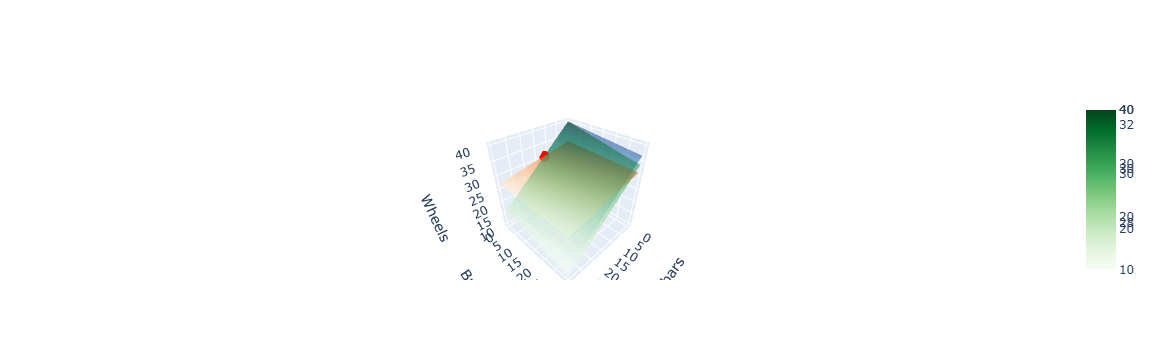

In [10]:
import plotly.graph_objects as go

# Define grid for x1 (handlebars) and x2 (brakes)
x1 = np.linspace(0, 30, 50)
x2 = np.linspace(0, 30, 50)
X1, X2 = np.meshgrid(x1, x2)

# Constraint surfaces (solving for x3 = wheels)
Z_al = (b[0] - 8*X1 - 1*X2) / 10 # from aluminium
Z_rb = (b[1] - 4*X1 - 1*X2) / 23 # from rubber
Z_pn = (b[2] - 4*X1 - 1*X2) / 5 # from paint

# Interactive 3D plot
fig = go.Figure()

fig.add_surface(x=x1, y=x2, z=Z_al, opacity=0.5, colorscale="Blues", name="Aluminium")
fig.add_surface(x=x1, y=x2, z=Z_rb, opacity=0.5, colorscale="Oranges", name="Rubber")
fig.add_surface(x=x1, y=x2, z=Z_pn, opacity=0.5, colorscale="Greens", name="Paint")

# Add solution point
fig.add_trace(go.Scatter3d(x=[x[0]], y=[x[1]], z=[x[2]],
mode="markers", marker=dict(size=6, color="red"),
name="Solution"))

fig.update_layout(
scene=dict(
xaxis_title="Handlebars",
yaxis_title="Brakes",
zaxis_title="Wheels"
))

fig.show()

## Conclusions

Here we solved a set of linear equations using algebra. Solving sets of
linear equations is closely related to regression, a topic we will learn
about in week 6.

## Extension

If you have time you can explore implementing an [ordinary least squares
regression](https://www.geeksforgeeks.org/data-science/ordinary-least-squares-ols-using-statsmodels/).

We have data from the factory - every day for a year they recorded how
many handlebars, brakes and wheels they made and the corresponding
amount of each resource used. We can load the data as:

In [10]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L4_data/factory_data.csv')

df.head()

Choose one dependent variable (`x1_handlebars',`x2_brakes’ or
\`x3_wheels’), and solve for production levels given the observed
resource usage.

*Hint:* You might want to use `statsmodels` OLS package which you can
read about
[here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).

#### Question

In [ ]:
import statsmodels.api as sm

# define independent variables (resources used)
X = ??

# add constant term for intercept
X = sm.add_constant(X)

# define dependent variable (e.g. production of handlebars)
y = ??

# fit OLS regression model
model = sm.OLS(y, X).fit()

# print model summary
print(model.summary())

## You’re Done!

Congratulations on completing the linear algebra practical! If you are
still working on it, take your time.

Don’t worry here about understanding every detail of the maths - focus
on each of the operations we looked at. Do you know what is being
calculated here? Why is that a useful thing to calculate? If you’re
struggling to understand this just ask!

It takes time to learn - remember practice makes perfect!